In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.model_selection import KFold

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../assests/scaled_voice_data.csv')

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,0.053833,0.182412,-0.043344,-0.211354,0.539997,0.538854,-0.240888,0.835319,-0.042416,0.207412,-0.837226,0.540973,-0.366495,male
1,-1.948336,1.299573,-2.059818,-1.855442,-0.519379,1.824196,0.163259,1.025120,1.077412,-2.141210,-1.247501,-1.089900,0.159773,male
2,0.646042,0.495259,0.871554,0.640148,1.145548,-0.095419,-0.201828,0.608758,0.670084,0.694611,0.648140,0.567828,-0.761240,female
3,0.676572,-0.985618,0.417501,0.876052,-0.107268,-1.056066,-0.218332,-0.515259,-0.533573,0.230766,0.775463,0.602869,-0.112419,female
4,0.945822,-0.909062,0.667029,1.041938,0.402815,-0.962975,-0.219860,-0.715600,-0.588908,0.517069,0.611636,0.652038,-0.295663,female


In [6]:
x = df.drop('gender',axis=1)
y = df['gender']

In [7]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx
0,0.053833,0.182412,-0.043344,-0.211354,0.539997,0.538854,-0.240888,0.835319,-0.042416,0.207412,-0.837226,0.540973,-0.366495
1,-1.948336,1.299573,-2.059818,-1.855442,-0.519379,1.824196,0.163259,1.025120,1.077412,-2.141210,-1.247501,-1.089900,0.159773
2,0.646042,0.495259,0.871554,0.640148,1.145548,-0.095419,-0.201828,0.608758,0.670084,0.694611,0.648140,0.567828,-0.761240
3,0.676572,-0.985618,0.417501,0.876052,-0.107268,-1.056066,-0.218332,-0.515259,-0.533573,0.230766,0.775463,0.602869,-0.112419
4,0.945822,-0.909062,0.667029,1.041938,0.402815,-0.962975,-0.219860,-0.715600,-0.588908,0.517069,0.611636,0.652038,-0.295663


In [8]:
y.head()

0      male
1      male
2    female
3    female
4    female
Name: gender, dtype: object

### Perform 10-Cross Validation for Neural Network (MLP)


In [9]:
def perform_mlp(x_train, y_train, x_test, y_test, i, k, activation, display_stats=False):
    mlp_model = MLPClassifier(hidden_layer_sizes=(256,32), activation=activation)
    mlp_model.fit(x_train, y_train)
    y_pred = mlp_model.predict(x_test)

    # Accuracy, Precision, Recall, F1-score of Model
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

    if display_stats:
        print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1_score}")
        print()

    return np.array([accuracy, precision, recall, f1_score])

Perform 10-Fold validation

In [10]:
def runKFoldForActivation(activation):
    k = 10
    i = 0
    k_fold = KFold(n_splits=k)

    # Holds Mean of {accuracy, precision, recall, f1_score}
    mean_stats = np.zeros(4)

    for train_index, test_index in k_fold.split(x):
        x_train, x_test = x.loc[train_index], x.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        stats = perform_mlp(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False, 
                                            activation=activation)
        mean_stats = mean_stats + stats

    # Take mean of {accuracy, precision, recall, f1_score}
    mean_stats = mean_stats / k

    print(f"Mean accuracy: {mean_stats[0]*100}")
    print(f"Mean Precision: {mean_stats[1]*100}")
    print(f"Mean Recall: {mean_stats[2]*100}")
    print(f"MeanF1-score: {mean_stats[3]*100}")

#### Run Neural network for ReLU Function

In [11]:
runKFoldForActivation(activation='relu')

Mean accuracy: 98.20109411811684
Mean Precision: 98.21570661986749
Mean Recall: 98.20109411811684
MeanF1-score: 98.20143899944439


#### Run Neural network for TanH Function

In [12]:
runKFoldForActivation(activation='tanh')

Mean accuracy: 98.16974803338259
Mean Precision: 98.18729082666489
Mean Recall: 98.16974803338259
MeanF1-score: 98.1703330659918


#### Run Neural network for Sigmoid Function

In [13]:
runKFoldForActivation(activation='logistic')

Mean accuracy: 97.60162520464802
Mean Precision: 97.6241483808265
Mean Recall: 97.60162520464802
MeanF1-score: 97.60256871265621


## ROC-AUC Curve for Neural Network with ReLU function

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [15]:
le = LabelEncoder()
Y_encoded = le.fit_transform(y)

In [16]:
xtrain_roc, xtest_roc, ytrain_roc, ytest_roc = train_test_split(x, Y_encoded, test_size=0.2)

In [17]:
def roc_auc(y_test, y_pred):
    fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
    lisrt=['male','female']
    for m in range(2):
        ls=[]
        for j in y_test:
            if m==j:
                ls.append(1)
            else:
                ls.append(0)

        fpr, tpr, thresh =  metrics.roc_curve(ls,y_pred[:,m])
        auc = metrics.roc_auc_score(ls,y_pred[:,m])
        axes[m].plot(fpr, tpr,  label="AUC = " +str(auc), linestyle='--',color='red')
        axes[m].set_title(f'ROC-AUC curve for class {lisrt[m]}')
        axes[m].set_xlabel('False Positive Rate')
        axes[m].set_ylabel('True Positive rate')
        axes[m].legend(lisrt[m])
        axes[m].text(0.5,0.0, f'AUC value :{auc}')
        plt.savefig('images/ROC-AUC_Neural_Network.png',dpi=300)
        plt.tight_layout()

Accuracy: 0.9826498422712934


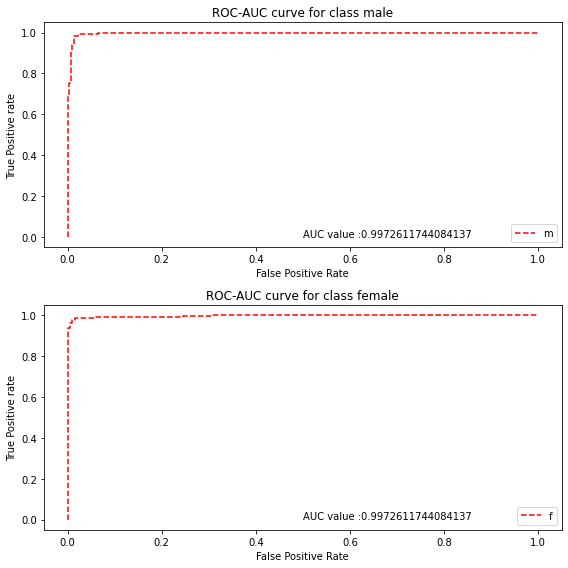

In [23]:
mlp_model = MLPClassifier(hidden_layer_sizes=(256,32), activation='relu')
mlp_model.fit(xtrain_roc, ytrain_roc)
ypred_roc = mlp_model.predict_proba(xtest_roc)

print('Accuracy:', mlp_model.score(xtest_roc, ytest_roc))
roc_auc(ytest_roc, ypred_roc)

# Loss curve plot for Artifical-Neural-Network

In [58]:
xtrain_roc, xtest_roc, ytrain_roc, ytest_roc = train_test_split(x, Y_encoded, test_size=0.7)

Training Accuracy score: 0.8968421052631579
Validation Accuracy score: 0.8985572587917042


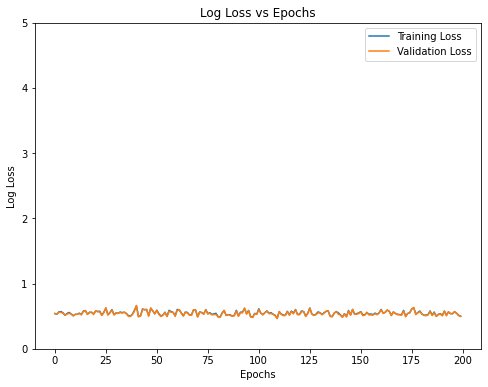

In [59]:
train_loss, test_loss = [], []
epochs = 200

for _ in range(epochs):
    mlp_model = MLPClassifier(hidden_layer_sizes=(256,32), activation='relu') 
    mlp_model.partial_fit(xtrain_roc, ytrain_roc, classes=np.unique(ytrain_roc))
    
    train_loss.append(metrics.log_loss(ytrain_roc, mlp_model.predict_proba(xtrain_roc)))
    test_loss.append(metrics.log_loss(ytest_roc, mlp_model.predict_proba(xtest_roc)))

print('Training Accuracy score:', mlp_model.score(xtrain_roc, ytrain_roc))
print('Validation Accuracy score:', mlp_model.score(xtest_roc, ytest_roc))

plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Epochs')
plt.ylim(0, 5)
plt.legend()
plt.savefig('images/Log_Loss_Neural_Network.png',dpi=300)